<a href="https://colab.research.google.com/github/ArnavK04/PH354-Assignments/blob/main/Kumar_Arnav_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question - 1**
time taken by ball is $\sqrt{\frac{2h}{g}}$

In [3]:
import math

def calculate_timeofflight(height):
  return math.sqrt(2*height/9.8)    # t = sqrt(2h/g)

if __name__ == "__main__":
  height_ = float(input("Enter initial height in meters "))
  print(f"Time taken to fall is {round(calculate_timeofflight(height_), 3)} s")

Enter initial height in meters 100
Time taken to fall is 4.518 s


# **Question - 2**
Speed of satellite in circular orbit of radius R is

$v = \sqrt{\frac{GM_e}{R}}$

therefore time period $T = \frac{2\pi R}{v} = \frac{2\pi R^{3/2}}{\sqrt{GM}}$

so $R = (\frac{GM_e}{4\pi^2})^{1/3}T^{2/3}$

In [1]:
import math

# defining constants in S.I units
M_EARTH = 5.97e24
G = 6.67e-11
R_EARTH = 6.371e6

def sat_altitude(period):
  orbit_radius = math.pow((G*M_EARTH*period*period)/(4*math.pi*math.pi),1./3)
  alt = orbit_radius - R_EARTH
  return alt

print(f"Required altitute for geosynchronous orbit 23 hr 93 mins is {round(sat_altitude(23.93*60*60)/1000, 2)} km")
print(f"Required altitute for a 24 hr orbit is {round(sat_altitude(24*60*60)/1000, 2)} km")
print(f"Required altitute for 90 minute orbit is {round(sat_altitude(90*60)/1000, 2)} km")
print(f"Required altitute for 45 minute orbit is {round(sat_altitude(45*60)/1000, 2)} km")


orb_period = float(input("Enter the time period of satellite in minutes "))
print(f"Required altitute for circular orbit is {round(sat_altitude(orb_period*60)/1000, 2)} km")

Required altitute for geosynchronous orbit 23 hr 93 mins is 35773.76 km
Required altitute for a 24 hr orbit is 35855.91 km
Required altitute for 90 minute orbit is 279.32 km
Required altitute for 45 minute orbit is -2181.56 km
Enter the time period of satellite in minutes 60
Required altitute for circular orbit is -1295.85 km


**Discussion for question - 2**


(b) We obtained the altitude of orbit with time period 45 minutes to be negative. This means that the radius of this orbit needs to be less than the earth's radius, which is not possible. Therefore there is a limit to how fast a satellite can orbit the earth.

(c) Geosynchronous orbits must have a time period equalt to sidereal day and not solar day (24 hrs) so that they can remain fixed at a given longitude. Since earth also revolves around the sun while spinning, its actual rotation period is different with respect to the stars and the sun. From the code we see that the difference in altitude between these two orbits would be around 82 kms.

# **Question - 3**
in polar, $r = \sqrt{x^2+y^2},\ \theta=\tan^{-1}(y/x)$

In [7]:
import math

def cartesian_to_polar(x,y):
  r = math.sqrt(x**2 + y**2)
  theta = math.atan(y/x)
  return r, theta*180/math.pi

x = float(input("Enter x coordinate "))
y = float(input("Enter y coordinate "))
r, theta = cartesian_to_polar(x,y)
print(f"Coordinates in polar form are ({r}, {theta})")

Enter x coordinate 1
Enter y coordinate 1
Coordinates in polar form are (1.4142135623730951, 45.0)


# **Question - 4**
For this question, we take c = 1. In other words, v is taken to be in units of c. That way, distances can be taken in light years and time in years. Formulae used are mentioned in comments.

Lorentz transformations from earth's to ship's frame are (c = 1)

$x'= \gamma (x - \beta ct) = \gamma (x-vt)$

$t'= \gamma (t - \beta x/c) = \gamma (t - vx) $

$\gamma = \frac{1}{\sqrt{1-\beta^2}} = \frac{1}{\sqrt{1-v^2}}$

In [12]:
import math

# c is taken to be 1 so that distances are in light-years and time in years.
# in other words, v is in units of c.

def gamma(v):
  # caculates gamma for given velocity (in units of c)
  return math.sqrt(1/(1-v**2))

def time_in_earth_frame(x,v):
  # time taken = distance in light years / speed of ship
  # since speed of ship is normalised by c already, time in years = x/v
  return x/v

def time_in_spaceship_frame(x,v):
  """
  In earth's frame, ship starts at (x_i,t_i) = (0,0) and reaches at (x_f,t_f) = (x,x/v).
  Transforming these events to spaceship's frame using lorentz transformations
  (x'_i, t'_i) = (0,0)
  x'_f = gamma(v)[x_f - v*t_f]
  t'_f = gamma(v)[t_f - v*x_f]
  """
  time_spaceship = gamma(v)*(time_in_earth_frame(x,v) - v*x)
  return time_spaceship

dist = float(input("Enter distance to planet in light-years "))
speed = float(input("Enter speed in terms of c "))
print(f"Time taken by ship in earth's frame is {time_in_earth_frame(dist,speed)} years")
print(f"Time taken by ship in spaceship's frame is {time_in_spaceship_frame(dist,speed)} years")

Enter distance to planet in light-years 1
Enter speed in terms of c 0.99
Time taken by ship in earth's frame is 1.0101010101010102 years
Time taken by ship in spaceship's frame is 0.14249228262288813 years


# **Question - 5**
For the potential given in the question (step function with V=$V_0$ for x>0 else V=0), one can solve the schrodinger equation to arrive at an expression for the reflection and transmission coefficients. This is done by assuming the the wave function is

$\psi(x) = Ae^{ikx} + Be^{-ikx}\ ;\ x<0 $ (incident + reflected wave)

$\psi(x) = Ce^{ilx}\ ;\ x>0$ (transmitted wave)

Using continuity and equating derivatives at x=0, one can get for $E>V_0$

relfection coefficient R = $\| \frac{B}{A}\|^2 = \frac{(\sqrt{E} - \sqrt{E-V_0})^4}{V_0^2}$

transmission coefficient T = 1-R

In [2]:
import math

def give_reflect_coeff(E,V):
  return math.pow((math.sqrt(E)-math.sqrt(E-V)),4)/(V*V)

def give_transmit_coeff(E,V):
  return 1-give_reflect_coeff(E,V)

m = 9.11e-31
E = 10 # in eV units dont matter as taking ratio in the end
V = 9

print(f"Reflection probability for E = {E} and V = {V} is {give_reflect_coeff(E,V)}")
print(f"Transmission probability for E = {E} and V = {V} is {give_transmit_coeff(E,V)}")

Reflection probability for E = 10 and V = 9 is 0.2698738636122385
Transmission probability for E = 10 and V = 9 is 0.7301261363877616


# **Question - 6**

In [8]:
C = 1 # catalan number, initialised to C_0=1
n = 1 # variable for iteration

while(C <= 1e9):
  print(f"{n} catalan number - {C}")
  C = int((4*n+2)*C/(n+2))
  n += 1

1 catalan number - 1
2 catalan number - 2
3 catalan number - 5
4 catalan number - 14
5 catalan number - 42
6 catalan number - 132
7 catalan number - 429
8 catalan number - 1430
9 catalan number - 4862
10 catalan number - 16796
11 catalan number - 58786
12 catalan number - 208012
13 catalan number - 742900
14 catalan number - 2674440
15 catalan number - 9694845
16 catalan number - 35357670
17 catalan number - 129644790
18 catalan number - 477638700


# **Question - 7**

Total potential felt by sodium atom is $V_{total} = \sum_{i,j,k}\pm \frac{e}{4\pi\epsilon_0a\sqrt{i^2 + j^2 + k^2}} = \frac{e}{4\pi\epsilon_0a}M$

$\therefore M = \sum_{i,j,k}\pm \frac{1}{\sqrt{i^2 + j^2 + k^2}} $

which is independent of atom spacing or other constants here.

In [2]:
import math

def find_potential_contri(a,b,c):
  # returns the term to be summed
  if (a==0 and b==0 and c==0):
    return 0.0  # dont count origin
  else:
    return 1./math.sqrt(a**2 + b**2 + c**2) # atom contribution without sign

def calculate_madelung(L):
  sum = 0.0
  count = 0.0
  for i in range(-L,L+1):
    for j in range(-L,L+1):
      for k in range(-L,L+1):
        term = find_potential_contri(i,j,k)
        if ((i+j+k)%2 == 0):
          sum += term
        else:
          sum -= term
  return sum

number_atoms = 200
print(f"Madelung constant for {number_atoms} atoms in each direction is {calculate_madelung(number_atoms)}")


Madelung constant for 200 atoms in each direction is -1.7446850421707383


# **Question - 8 Function block**

Functions for all parts are defined in this code block

In [4]:
import math

# functions for all parts defined here

def find_binding_energy(A,Z):
  # finds binding energy for (A,Z)
  a_1 = 15.67
  a_2 = 17.23
  a_3 = 0.75
  a_4 = 93.2
  a_5 = 0.0
  if (A%2==0 and Z%2==0):
    a_5 = 12.0
  elif (A%2==0 and Z%2==1):
    a_5 = -12.0
  B = a_1*A - a_2*math.pow(A,2./3) - a_3*Z*Z/math.pow(A,1./3) - a_4*(A-2*Z)**2/A + a_5/math.sqrt(A)
  return B

def find_most_stable_A(Z):
  # finds most stable mass for Z
  Stable_A = Z
  Stable_B_per_nucleon = find_binding_energy(Z,Z)/Z   # energy per nucleon

  for A in range(Z, 3*Z+1):
    B_per_nucleon = find_binding_energy(A,Z)/A
    if (B_per_nucleon > Stable_B_per_nucleon):
      Stable_A = A
      Stable_B_per_nucleon = B_per_nucleon

  return Stable_A, Stable_B_per_nucleon

# **Question - 8 (a),(b)**

In [5]:
# Run question - 8 function block first

Atomic_mass = int(input("Enter atomic mass of the atom "))
Atomic_number = int(input("Enter atomic number of the atom "))

print(f"Nuclear binding energy in eV is {round(find_binding_energy(Atomic_mass,Atomic_number), 2)}")
print(f"Binding energy per nucleon in eV is {round(find_binding_energy(Atomic_mass,Atomic_number)/Atomic_mass, 2)}")


Enter atomic mass of the atom 58
Enter atomic number of the atom 28
Nuclear binding energy in eV is 493.94
Binding energy per nucleon in eV is 8.52


# **Question - 8 (c)**

In [6]:
# Run question - 8 function block first

Z = int(input("Enter atomic number of the atom "))
Stable_mass, Stable_benergy_per_nucleon = find_most_stable_A(Z)
print(f"Most stable configuration for the nucleus for Z = {Z} is A = {Stable_mass} with binding energy per nucleon = {Stable_benergy_per_nucleon}")

Enter atomic number of the atom 24
Most stable configuration for the nucleus for Z = 24 is A = 50 with binding energy per nucleon = 8.532622751365931


# **Question - 8 (d)**

In [7]:
# Run question - 8 function block first

Stable_Z_0 = 1
Stable_mass_0, B_per_nucleon_0 = find_most_stable_A(1)

for Z in range (1,101):
  Stable_mass, B_per_nucleon = find_most_stable_A(Z)
  print(f"Most stable mass for Z = {Z} is {Stable_mass}")
  if (B_per_nucleon  > B_per_nucleon_0):
    B_per_nucleon_0 = B_per_nucleon
    Stable_mass_0 = Stable_mass
    Stable_Z_0 = Z

print(f"Most stable nucleus of all is Z = {Stable_Z_0} with A = {Stable_mass_0} and binding energy per nucleon = {B_per_nucleon_0}")


Most stable mass for Z = 1 is 2
Most stable mass for Z = 2 is 4
Most stable mass for Z = 3 is 6
Most stable mass for Z = 4 is 8
Most stable mass for Z = 5 is 10
Most stable mass for Z = 6 is 12
Most stable mass for Z = 7 is 15
Most stable mass for Z = 8 is 16
Most stable mass for Z = 9 is 19
Most stable mass for Z = 10 is 20
Most stable mass for Z = 11 is 23
Most stable mass for Z = 12 is 24
Most stable mass for Z = 13 is 27
Most stable mass for Z = 14 is 28
Most stable mass for Z = 15 is 31
Most stable mass for Z = 16 is 32
Most stable mass for Z = 17 is 35
Most stable mass for Z = 18 is 36
Most stable mass for Z = 19 is 39
Most stable mass for Z = 20 is 41
Most stable mass for Z = 21 is 43
Most stable mass for Z = 22 is 46
Most stable mass for Z = 23 is 47
Most stable mass for Z = 24 is 50
Most stable mass for Z = 25 is 51
Most stable mass for Z = 26 is 54
Most stable mass for Z = 27 is 55
Most stable mass for Z = 28 is 58
Most stable mass for Z = 29 is 59
Most stable mass for Z = 30

The code shows most stable Z is 24, which is not true. The most stable nucleus is $Fe_{26}^{56}$

# **Question - 9 (a)**

In [9]:
def factorial(n):
  if (n==0):
    return 1
  else:
    return factorial(n-1)*n

def find_bin_coeff(n,k):
  return int(factorial(n)/(factorial(k)*factorial(n-k)))

print(find_bin_coeff(6,0))
print(find_bin_coeff(6,3))

1
20


# **Question - 9 (b)**
Run part (a) first.

In [44]:
# run question - 9 part (a) first

for i in range(1,21):
  for j in range(0, i+1):
    print(find_bin_coeff(i,j), end = " ")
  print()

1 1 
1 2 1 
1 3 3 1 
1 4 6 4 1 
1 5 10 10 5 1 
1 6 15 20 15 6 1 
1 7 21 35 35 21 7 1 
1 8 28 56 70 56 28 8 1 
1 9 36 84 126 126 84 36 9 1 
1 10 45 120 210 252 210 120 45 10 1 
1 11 55 165 330 462 462 330 165 55 11 1 
1 12 66 220 495 792 924 792 495 220 66 12 1 
1 13 78 286 715 1287 1716 1716 1287 715 286 78 13 1 
1 14 91 364 1001 2002 3003 3432 3003 2002 1001 364 91 14 1 
1 15 105 455 1365 3003 5005 6435 6435 5005 3003 1365 455 105 15 1 
1 16 120 560 1820 4368 8008 11440 12870 11440 8008 4368 1820 560 120 16 1 
1 17 136 680 2380 6188 12376 19448 24310 24310 19448 12376 6188 2380 680 136 17 1 
1 18 153 816 3060 8568 18564 31824 43758 48620 43758 31824 18564 8568 3060 816 153 18 1 
1 19 171 969 3876 11628 27132 50388 75582 92378 92378 75582 50388 27132 11628 3876 969 171 19 1 
1 20 190 1140 4845 15504 38760 77520 125970 167960 184756 167960 125970 77520 38760 15504 4845 1140 190 20 1 


# **Question - 9 (c)**
Run part (a) first.

In [10]:
# run question - 9 part (a) first
import math

def find_prob_k_heads_of_n(n,k):
  return find_bin_coeff(n,k)/math.pow(2,n)

print(f"Probability that heads comes up 60 out of 100 is {find_prob_k_heads_of_n(100,60)}")

total_prob = 0
for i in range(60,101):
  total_prob += find_prob_k_heads_of_n(100,i)  # summing all probabilities as events are disjoint

print(f"Probability of heads coming 60 or more times is {total_prob}")


Probability that heads comes up 60 out of 100 is 0.010843866711637987
Probability of heads coming 60 or more times is 0.028443966820490392


# **Question - 10 loading the file**

In [21]:
file_path = "/content/drive/MyDrive/Comp_phy_homeworks/Assignment_1_files/sunspots.txt"

"""with open(file_path) as f:
    text = f.read()
    print(text)"""

import matplotlib.pyplot as plt
import numpy as np

sunspots = np.loadtxt(file_path)

# **Question - 10 (a)**

Text(0, 0.5, 'number of sunspots')

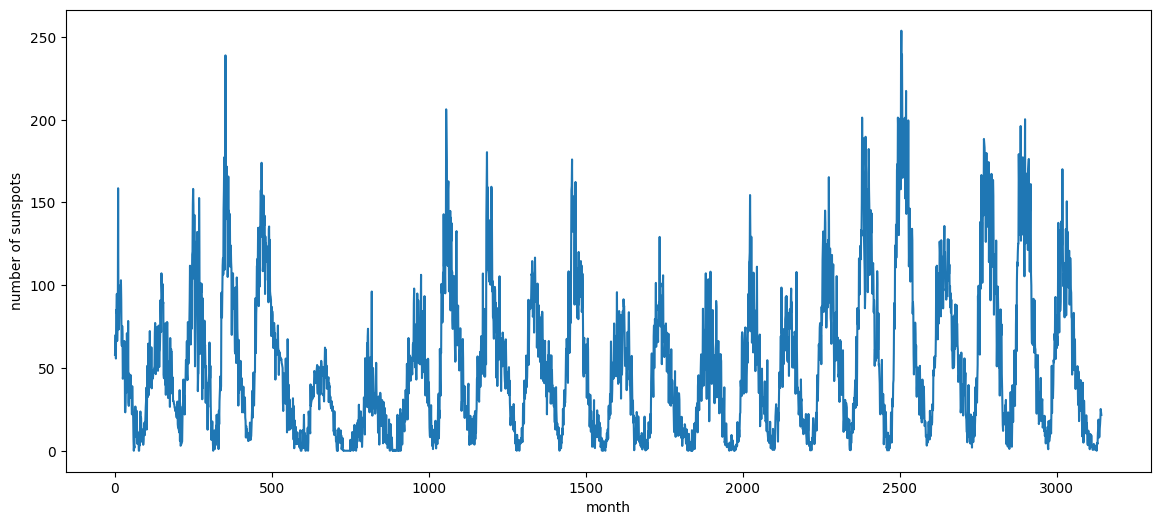

In [19]:
# load the file from above first

plt.figure(figsize=(14,6))

plt.plot(sunspots[:, 0], sunspots[:,1])
plt.xlabel("month")
plt.ylabel("number of sunspots")

# **Question - 10 (b)**

Text(0, 0.5, 'number of sunspots')

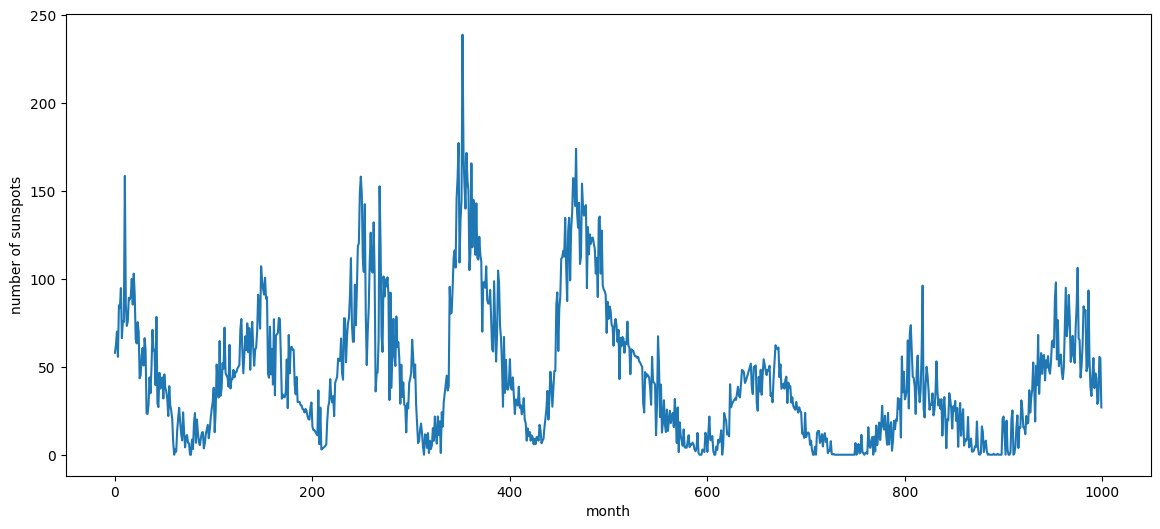

In [20]:
# load the file from above first

plt.figure(figsize=(14,6))

plt.plot(sunspots[:1000, 0], sunspots[:1000,1])
plt.xlabel("month")
plt.ylabel("number of sunspots")

# **Question - 10 (c)**

Text(0, 0.5, 'number of sunspots')

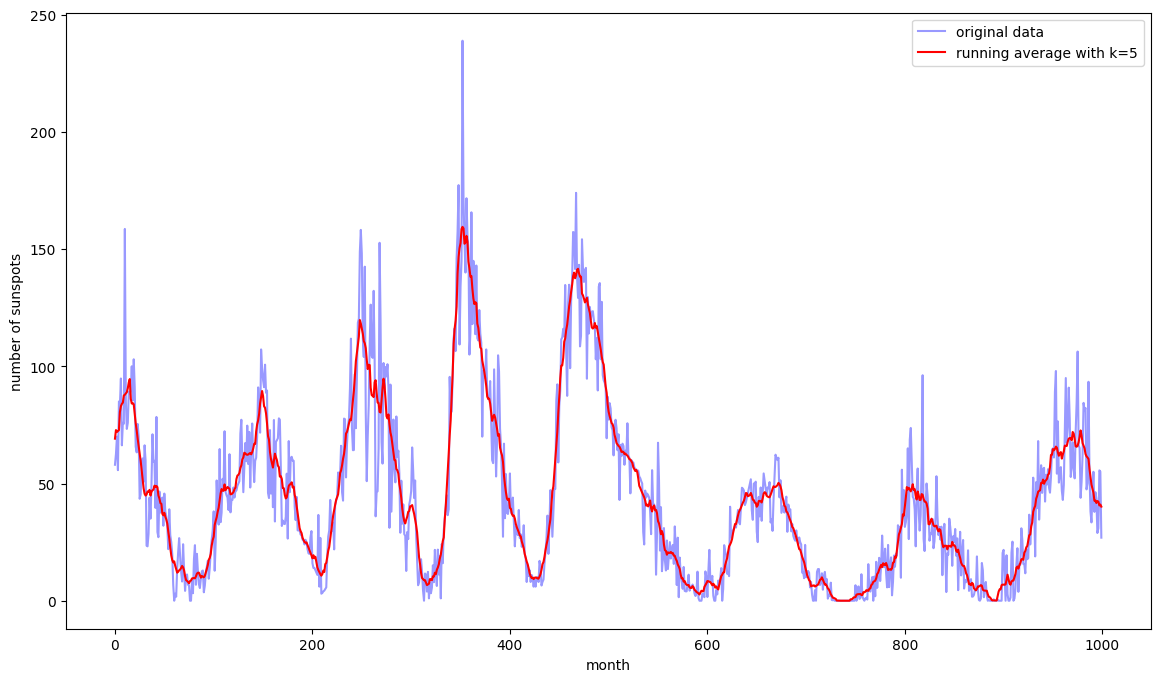

In [49]:
def calculate_running_Avg(array, r):
  array_copy = array.copy()
  for i in range(0,len(array)):
    if ((i-r)<0):
      # handeling first few elements to prevent index out of range error
      array_copy[i] = np.mean(array[0:i+r+1])
    elif ((i+r)>(len(array)-1)):
      # handeling last few elements to prevent index out of range error
      array_copy[i] = np.mean(array[i-r:len(array)])
    else:
      array_copy[i] = np.mean(array[i-r:i+r+1])
  return array_copy

plt.figure(figsize=(14,8))

plt.plot(sunspots[:1000, 0], sunspots[:1000,1], label = "original data", color = "blue", alpha = 0.4)
plt.plot(sunspots[:1000,0], calculate_running_Avg(sunspots[:1000, 1], 5), label = "running average with k=5", color = "red")
plt.legend()
plt.xlabel("month")
plt.ylabel("number of sunspots")

# **Question - 11 (a)**

Text(0.5, 0, 'X')

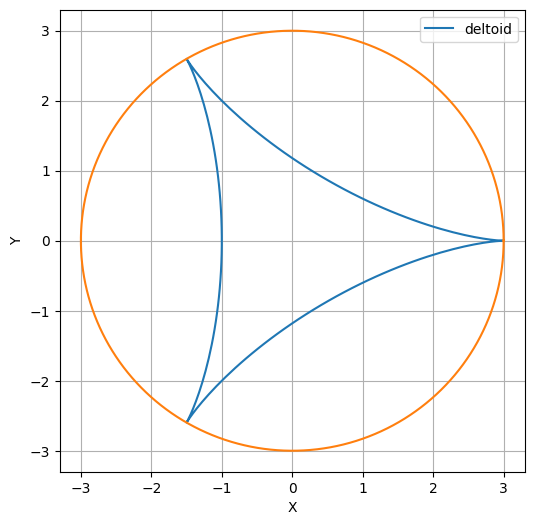

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math

def calc_x(theta):
  return 2*np.cos(theta) + np.cos(2*theta)

def calc_y(theta):
  return 2*np.sin(theta) - np.sin(2*theta)

theta_0 = np.linspace(0,2*math.pi,200)

plt.figure(figsize=(6,6))
plt.plot(calc_x(theta_0), calc_y(theta_0), label="deltoid")
plt.plot(3*np.cos(theta_0), 3*np.sin(theta_0))
plt.legend()
plt.grid(axis="both")
plt.ylabel("Y")
plt.xlabel("X")

# **Question - 11 (b)**

Text(0.5, 1.0, 'Galilean Spiral')

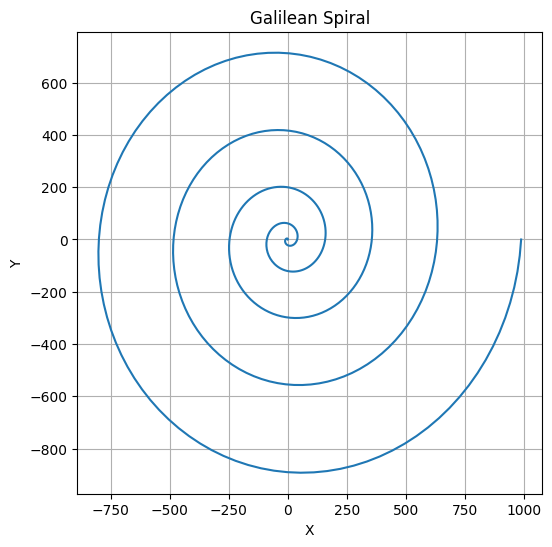

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

def calculate_x_from_polar(r,theta):
  return r*np.cos(theta)

def calculate_y_from_polar(r,theta):
  return r*np.sin(theta)

def galilean_spiral(theta):
  return theta**2

theta_0 = np.linspace(0,10*math.pi,500)
r_0 = galilean_spiral(theta_0)

plt.figure(figsize=(6,6))
plt.plot(calculate_x_from_polar(r_0,theta_0),calculate_y_from_polar(r_0,theta_0), label="galilean spiral")
plt.grid(axis="both")
plt.ylabel("Y")
plt.xlabel("X")
plt.title("Galilean Spiral")


# **Question - 11 (c)**
Run part (b) first because this block uses functions defined there.

Text(0.5, 1.0, "Fey's function")

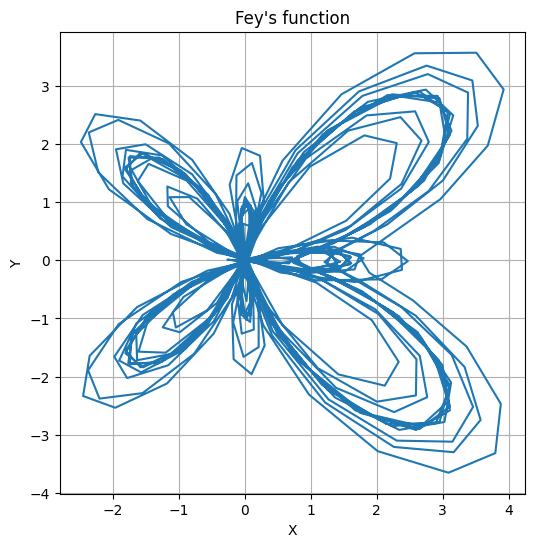

In [14]:
# run question - 11 part(b) first

def fey_func(theta):
  return np.exp(np.cos(theta)) - 2*np.cos(4*theta) + np.pow(np.sin(theta/12),5)

theta_0 = np.linspace(0,24*math.pi,500)
r_0 = fey_func(theta_0)

plt.figure(figsize=(6,6))
plt.plot(calculate_x_from_polar(r_0,theta_0), calculate_y_from_polar(r_0,theta_0), label="galilean spiral")
plt.grid(axis="both")
plt.ylabel("Y")
plt.xlabel("X")
plt.title("Fey's function")

# **Question - 12**

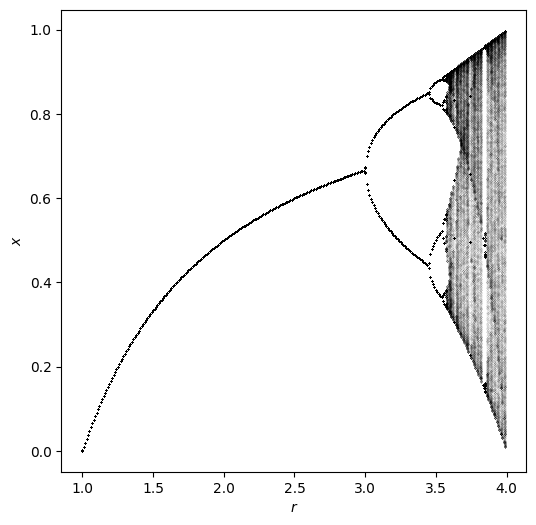

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math

def give_x_prime(r,x):
  return r*x*(1-x)

r_values = np.arange(1.0,4.0,0.01)

plt.figure(figsize=(6,6))

for r in r_values:
  x_ = 0.5
  x_array = np.zeros(2000)
  for i in range(0,1000):
    x_ = give_x_prime(r, x_)
  for i in range(0,2000):
    x_ = give_x_prime(r, x_)
    x_array[i] = x_
  plt.plot(np.full(2000,r), x_array, color="black",marker="o",markersize=0.02, linestyle="None")
plt.xlabel(r"$r$")
plt.ylabel(r"$x$")

plt.show()


(a) For a fixed point, $x' = rx'(1-x')$
Therefore iterating again and again would give the same point. For a given value of r, only one value of x would be there on the plot (after transients are removed). A limit cycle would correspond to 2,4, etc number of points on x axis for a given value of r. For chaos, one value of r would map to multiple points as can be seen after $r \approx 3.5$

(b)
From the plot, one can see by eye that $r\approx 3.5$ cooresponds to the edge of chaos.